<a href="https://colab.research.google.com/github/hanseul1215/ESAA_study/blob/master/0620_%ED%95%A9%EC%84%B1%EA%B3%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 합성곱 신경망(CNN : Convolutional Neural Network)
데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에서 많이 사용된다.   
- **이미지 분류**: 이미지로 모델을 학습하면 모델은 이미지의 특징을 추출해 대상을 분류할 수 있음
- **객체 탐지**: 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술
- **스타일 전이**: 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술

## 1-1 이미지 표현
- 이미지는 컴퓨터가 이해할 수 있게 숫자로 표현해야함
- 채널은 각각이 하나의 이미지로 구분되며, 컬러이미지는 3개의 채널 이미지(R, G, B)를 하나로 결합하여 표현하는 방식

## 1-2 합성곱 연산
입력 이미지에 대해 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 방법
- 합성곱 연산을 통해 추출된 이미지를 특성맵이라고 부름
- element-wise 곱셈 연산 -> 모두 더한 값 (단일 스칼라 값)을 feature map의 값에 대입
- 오차 역전파(back propagation)으로 커널의 가중치를 업데이트함
- 커널의 공유 가중치로 합성곱은 이미지 특성 추출에 효율적임

## 1-3 채널
입력 이미지를 구성하는 2차원 배열의 개수를 나타냄
- 커널 적용, 합성곱 연산 -> elment-wise 덧셈 연산

## 1-4 스트라이드
커널이 합성곱 연산을 수행하며 이동하는 간격

##1-5 패딩
추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 하는 것


## 1-6 특성맵 사이즈
[출력 크기]   
= [(입력 Height + 2패딩 - 커널 Height)/스트라이드 +1,   
(입력 Weight + 2패딩 - 커널 Weight)/스트라이드 +1]

## 1-7 풀링
추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어로 과대적합을 방지한다.

#4.2 간단한 모델 생성

## 2-1 데이터 로드 및 전처리

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


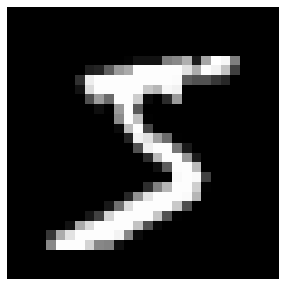

In [ ]:
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()
  
plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
# 정규화 변환
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis] # 가장 마지막 축에 채널을 추가
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## 2-2 Sequential API로 모델 생성, 학습
Sequential API를 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 모델을 만들자

In [ ]:
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',   # 커널(3*3) 32개
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2175 - accuracy: 0.9380 - val_loss: 0.0917 - val_accuracy: 0.9734
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0819 - accuracy: 0.9763 - val_loss: 0.0609 - val_accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0609 - accuracy: 0.9820 - val_loss: 0.0542 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0494 - accuracy: 0.9854 - val_loss: 0.0562 - val_accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0598 - val_accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0349 - accuracy: 0.9894 - val_loss: 0.0530 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0536 -

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.0614 - accuracy: 0.9831


[0.061393365263938904, 0.9830999970436096]

훈련 셋에 대한 손실은 계속 줄어드는데 검증 셋의 손실은 어느 정도 수준에서 더 이상 낮아지지 않음  
-> epoch = 4에서 과대적합되었다고 판단

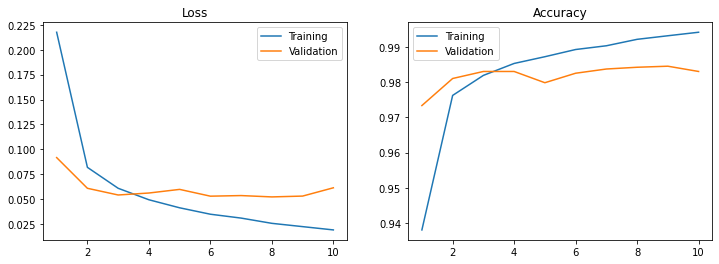

In [ ]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

# 2-3 모델 구조 파악
- summary() : 모델의 구조를 요약해서 보여줌
   (각 레이어의 이름, 출력 텐서의 형태, 각 레이어를 구성하는 파라미터 개수...)

In [ ]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
# 레이어 
model.layers # 4개 레이어로 구성, 파이썬의 리스트 형태로 레이어 객체를 담아서 보여줌

In [ ]:
# 첫번째 레이어 선택
model.layers[0]

In [ ]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [ ]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.11215724,  0.24349707, -0.22561517,  0.35727805,
           -0.3958075 , -0.37557453, -1.2447491 ,  0.29719472,
            0.21322122,  0.33417034,  0.3506563 , -0.25152317,
           -0.80711544, -0.64257336,  0.3340164 ,  0.0750218 ,
            0.23450531, -0.6152372 ,  0.28213966,  0.33305305,
            0.42939854, -0.17412943, -0.47625342,  0.1901959 ,
            0.24546449,  0.34461197, -1.38575   ,  0.02754508,
            0.33213243, -0.7283569 ,  0.02620695, -0.75727504]],
 
         [[ 0.4886649 ,  0.02866049,  0.24872518, -0.26457533,
           -0.41197926,  0.18223369, -0.22949713,  0.17518547,
            0.39488137,  0.12989707,  0.65732765, -0.25220135,
           -0.22531007,  0.04521491,  0.07984622,  0.03868134,
            0.21962582, -0.04365139,  0.26813745, -0.27635774,
           -0.06044965,  0.25781468, -0.07782122,  0.4768256 ,
            0.55454004, -0.16140993, -0.19

In [ ]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.11215724,  0.24349707, -0.22561517,  0.35727805,
          -0.3958075 , -0.37557453, -1.2447491 ,  0.29719472,
           0.21322122,  0.33417034,  0.3506563 , -0.25152317,
          -0.80711544, -0.64257336,  0.3340164 ,  0.0750218 ,
           0.23450531, -0.6152372 ,  0.28213966,  0.33305305,
           0.42939854, -0.17412943, -0.47625342,  0.1901959 ,
           0.24546449,  0.34461197, -1.38575   ,  0.02754508,
           0.33213243, -0.7283569 ,  0.02620695, -0.75727504]],

        [[ 0.4886649 ,  0.02866049,  0.24872518, -0.26457533,
          -0.41197926,  0.18223369, -0.22949713,  0.17518547,
           0.39488137,  0.12989707,  0.65732765, -0.25220135,
          -0.22531007,  0.04521491,  0.07984622,  0.03868134,
           0.21962582, -0.04365139,  0.26813745, -0.27635774,
          -0.06044965,  0.25781468, -0.07782122,  0.4768256 ,
           0.55454004, -0.16140993, -0.195005  ,  0.227014

In [ ]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-9.95789468e-02, -3.20202798e-01, -2.33362660e-01, -3.95956337e-01,
        2.15603352e-01, -1.62658855e-01, -2.96238586e-02, -3.66915941e-01,
       -7.33706984e-05, -4.10330772e-01,  1.13863302e-02, -6.94622323e-02,
       -8.09016731e-03, -2.20579859e-02, -3.77810627e-01, -1.31801799e-01,
       -2.82144219e-01, -2.93493569e-01, -4.58813459e-02, -3.39955211e-01,
       -1.98773324e-01, -2.78412968e-01, -1.41842917e-01, -3.58938485e-01,
        2.65991408e-03, -4.01537538e-01, -4.00252976e-02, -1.84315875e-01,
       -4.24117893e-01,  3.40891220e-02, -2.68992901e-01, -1.23474956e-01],
      dtype=float32)>

In [ ]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [ ]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

2

In [ ]:
#(1(입력이미지 개수), 26, 26, 32)
# 첫 번째 레이어(conv) 출력층 
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

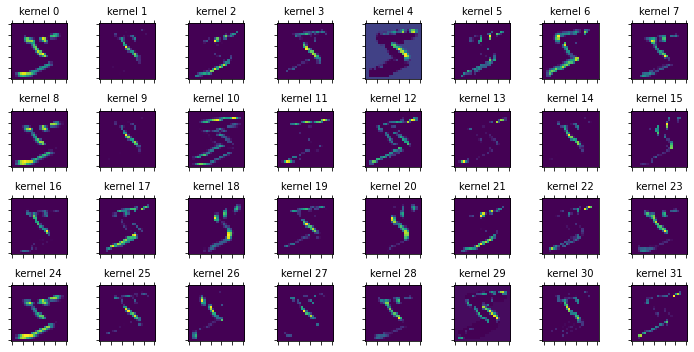

In [ ]:
# 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
#(1, 13, 13, 32)
# 두 번째 레이어(pool) 출력층 (최대 풀링 레이어)
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


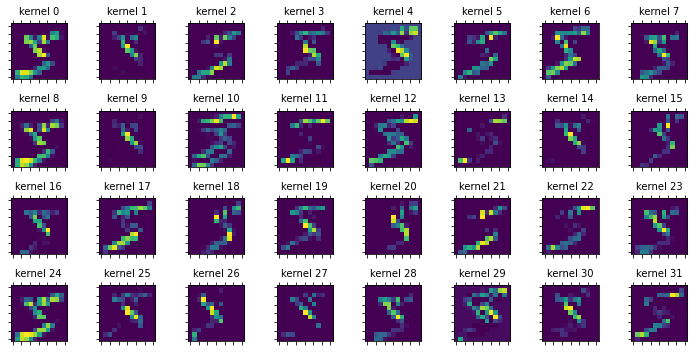

In [ ]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

# 4.3 복잡한 모델 생성

## 3-1 데이터셋 준비

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


y_train 값이 홀수면 1, 짝수면 0으로 하는 y_train_odd 배열을 새로 만들자

In [ ]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape


(60000,)

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [ ]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [ ]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1) # 새로운 축을 끝에 추가
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


색상이 하나인 모노 컬러 이미지 -> 채널 개수 1개

## 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

- 입력 레이어는 2개의 출력을 갖게됨  
>1 서로 다른 2개의 출력은 각각 다른 레이어의 입력으로 사용  
> 2 Concatenate 레이어에서 합쳐짐  
> 3 Dense 레이어를 통과

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

ImportError: ignored

입력 데이터가 두개의 출력으로 나뉘고, 마지막 Dense 레이어를 통과하기 전에 Concatenate 레이어에서 하나로 합쳐지는 구조를 시각적으로 확인

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1989 - accuracy: 0.9445 - val_loss: 0.0831 - val_accuracy: 0.9750
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0762 - accuracy: 0.9778 - val_loss: 0.0652 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0586 - accuracy: 0.9826 - val_loss: 0.0646 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0485 - accuracy: 0.9852 - val_loss: 0.0559 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0629 - val_accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0561 - val_accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0548 -

정확도는 Sequential 모델과 큰 차이는 없음

## 3-3 다중 출력 분류 모델
두 가지 서로 다른 분류 문제를 예측하는 다중 출력 모델을 만들자  
> 0~9 숫자 + 홀, 짝

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

지정한 이름을 key, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3633 - digit_dense_loss: 0.2007 - odd_dense_loss: 0.3253 - digit_dense_accuracy: 0.9424 - odd_dense_accuracy: 0.8626 - val_loss: 0.2226 - val_digit_dense_loss: 0.0847 - val_odd_dense_loss: 0.2757 - val_digit_dense_accuracy: 0.9743 - val_odd_dense_accuracy: 0.8894
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2122 - digit_dense_loss: 0.0761 - odd_dense_loss: 0.2721 - digit_dense_accuracy: 0.9775 - odd_dense_accuracy: 0.8915 - val_loss: 0.1952 - val_digit_dense_loss: 0.0633 - val_odd_dense_loss: 0.2638 - val_digit_dense_accuracy: 0.9795 - val_odd_dense_accuracy: 0.8963
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1893 - digit_dense_loss: 0.0580 - odd_dense_loss: 0.2628 - digit_dense_accuracy: 0.9827 - odd_dense_accuracy: 0.8959 - val_loss: 0.1908 - val_digit_dense_loss: 0.0607 - val_odd_dense_loss: 0.2603 - val_digit_dense_accuracy: 0.9793 -

In [ ]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 8ms/step - loss: 0.1877 - digit_dense_loss: 0.0598 - odd_dense_loss: 0.2558 - digit_dense_accuracy: 0.9828 - odd_dense_accuracy: 0.9006


[0.18767784535884857,
 0.059794824570417404,
 0.25576600432395935,
 0.9828000068664551,
 0.900600016117096]

정확도: 숫자 맞춤 > 짝, 홀 여부 

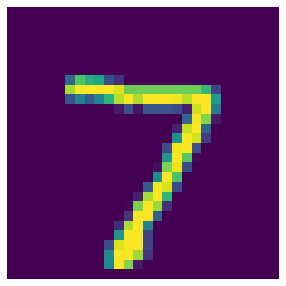

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

In [ ]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[1.8521183e-12 2.9130939e-10 5.3248304e-09 7.5710625e-07 1.1651352e-11
 8.7914089e-13 3.8965396e-20 9.9999928e-01 2.7062035e-09 5.2058682e-09]
[0.99959517]


In [ ]:
digit_labels = np.argmax(digit_preds, axis=-1) # 예측 확률 -> 정답 레이블로 변환
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

## 3-4 전이 학습
앞서 훈련한 모델의 일부를 그대로 사용 + 최종 출력층만 새롭게 추가

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [ ]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1290 - accuracy: 0.9631 - val_loss: 0.0693 - val_accuracy: 0.9776
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0579 - accuracy: 0.9828 - val_loss: 0.0530 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0447 - accuracy: 0.9864 - val_loss: 0.0547 - val_accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.0524 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0469 - val_accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.0531 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0576 -

In [ ]:
# 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1144 - accuracy: 0.9689 - val_loss: 0.0611 - val_accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.0542 - val_accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0504 - val_accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0532 - val_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0219 - accuracy: 0.9935 - val_loss: 0.0483 - val_accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0546 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.0554 - val_ac

In [ ]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1154 - accuracy: 0.9691 - val_loss: 0.0586 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0478 - accuracy: 0.9864 - val_loss: 0.0594 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0359 - accuracy: 0.9891 - val_loss: 0.0576 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.0567 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0225 - accuracy: 0.9932 - val_loss: 0.0549 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0525 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0147 - accuracy: 0.9958 - val_loss: 0.0569 - val_ac